Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWarning: Passing (type, 1) or '1type

0


C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:959: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:967: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


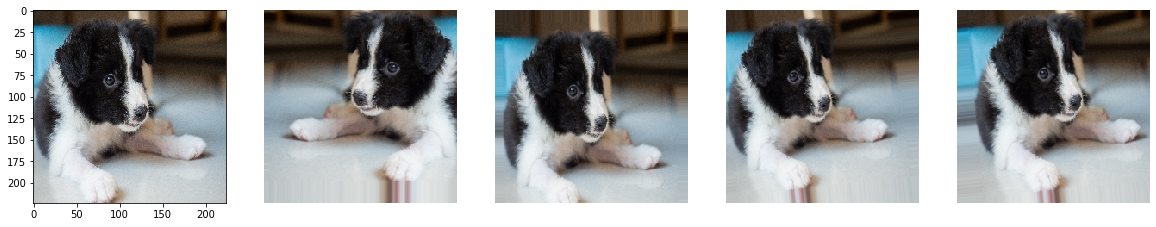

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline


print(0)
##定義使用的Augmentation
img_gen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=10,width_shift_range=0.1,
                             height_shift_range=0.1,shear_range=0.1 ,zoom_range=0.1,
                             horizontal_flip=True,vertical_flip=False)
width=224
height=224
batch_size=4

img = cv2.imread('c:\\home\\Tano.JPG')  
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy()
img= np.array(img, dtype=np.float32)
img_combine=np.array([img,img,img,img],dtype=np.uint8) ##輸入generator要是四維，(224,224,3)變成(4,224,224,3)
batch_gen = img_gen.flow(img_combine, batch_size=4)
assert next(batch_gen).shape==(batch_size, width, height, 3)

print(1)
plt.figure(figsize=(20,10))
i = 1
for batch in batch_gen:
    plt.subplot(1, 5, 1)
    plt.imshow(img_origin) ##原圖
    plt.subplot(1, 5, i+1)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.imshow(batch[1, :, :, :].astype(np.uint8))
    plt.imshow(batch[2, :, :, :].astype(np.uint8))
    plt.imshow(batch[3, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 4:
        break  # or the generator would loop infinitely

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *

# Training Generator
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# Test Generator，只需要Rescale，不需要其他增強
test_datagen = ImageDataGenerator(rescale=1. / 255)

# 將路徑給Generator，自動產生Label
training_set = train_datagen.flow_from_directory('c:\\home\\dataset\\training_set',
                                                 target_size=(64, 64),
                                                 batch_size=1,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('c:\\home\\dataset\\test_set',
                                            target_size=(64, 64),
                                            batch_size=1,
                                            class_mode='categorical')

##定義classifier
img_input = Input(shape=(64, 64, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(2, activation='sigmoid', name='fc1')(x)
classifier = Model(img_input, x, name='classifier')

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練
classifier.fit_generator(training_set, steps_per_epoch=1, nb_epoch=25,
                         validation_data=test_set, validation_steps=20)


#預測新照片
from keras.preprocessing import image as image_utils
test_image = image_utils.load_img('c:\\home\\dataset\\test_set\\cats\\cat.4001.jpg', target_size=(64, 64))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image/=255.

result = classifier.predict_on_batch(test_image)

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=1, validation_data=<keras_pre..., validation_steps=20, epochs=25)`


Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 0.7316 - acc: 0.0000e+00 - val_loss: 0.9691 - val_acc: 0.5000
Epoch 2/25
1/1 [==============================] - 1s 775ms/step - loss: 1.9542 - acc: 0.0000e+00 - val_loss: 0.6866 - val_acc: 0.5000
Epoch 3/25
1/1 [==============================] - 1s 789ms/step - loss: 0.5267 - acc: 1.0000 - val_loss: 0.6806 - val_acc: 0.6000
Epoch 4/25
1/1 [==============================] - 1s 773ms/step - loss: 0.6684 - acc: 1.0000 - val_loss: 0.6810 - val_acc: 0.5000
Epoch 5/25
1/1 [==============================] - 1s 729ms/step - loss: 0.7779 - acc: 0.0000e+00 - val_loss: 0.6840 - val_acc: 0.8000
Epoch 6/25
1/1 [==============================] - 1s 735ms/step - loss: 0.7044 - acc: 0.0000e+00 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 7/25
1/1 [==============================] - 1s 889ms/step - loss: 0.6633 - acc: 1.0000 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 8/25
1/1 [==============================] - 1s 1s/step - loss: 0.9407 -

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


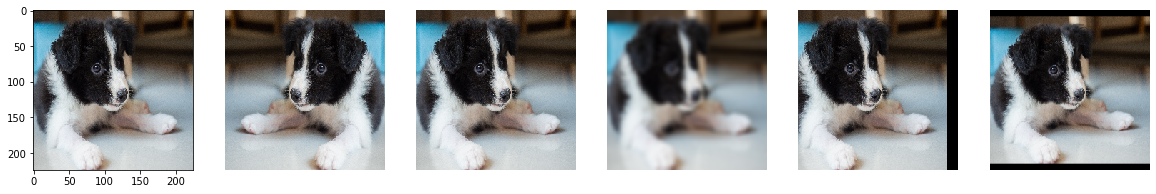

In [3]:
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('c:\\home\\Tano.JPG')
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy()
img= np.array(img, dtype=np.float32)

images = np.random.randint(0, 255, (5, 224, 224, 3), dtype=np.uint8)##創造一個array size==(5, 224, 224, 3)

flipper = iaa.Fliplr(1.0) #水平翻轉機率==1.0
images[0] = flipper.augment_image(img)

vflipper = iaa.Flipud(0.4) #垂直翻轉機率40%
images[1] = vflipper.augment_image(img)

blurer = iaa.GaussianBlur(3.0)
images[2] = blurer.augment_image(img) # 高斯模糊圖像( sigma of 3.0)

translater = iaa.Affine(translate_px={"x": -16}) #向左橫移16個像素
images[3] = translater.augment_image(img)

scaler = iaa.Affine(scale={"y":(0.8, 1.2)}) # 縮放照片，區間(0.8-1.2倍)
images[4] = scaler.augment_image(img)

i=1
plt.figure(figsize=(20,20))
for image in images:
    plt.subplot(1, 6, 1)
    plt.imshow(img_origin.astype(np.uint8))
    plt.subplot(1, 6, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    i+=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


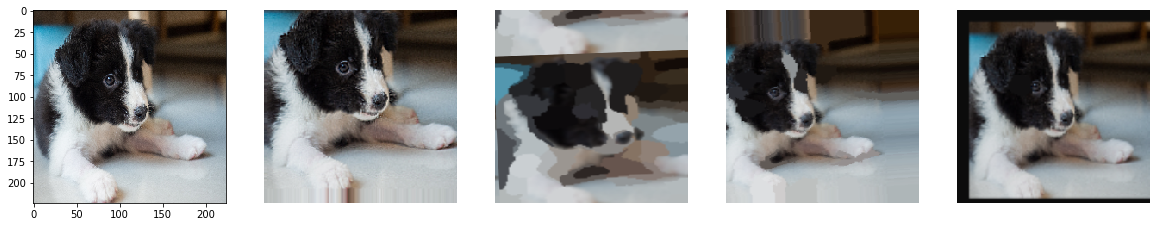

In [4]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

##輸入照片
img = cv2.imread('c:\\home\\Tano.JPG')
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy()
img= np.array(img)  #, dtype=np.float32) ?

img_combine=np.array([img,img,img,img])  #, dtype=np.float32) ?

sometimes = lambda aug: iaa.Sometimes(0.5, aug) # Sometimes(0.5, ...) 代表每次都有50%的機率運用不同的Augmentation

##包裝想運用之圖像強化方式
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)),
    iaa.Fliplr(0.4),
   sometimes(iaa.CropAndPad(
        percent=(-0.05, 0.1),
        pad_mode=ia.ALL,
        pad_cval=(0, 255)
    )),
    sometimes(iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-10, 10),
        shear=(-8, 8),
        order=[0, 1],
        cval=(0, 255),
        mode=ia.ALL
    )),
    sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
    sometimes(iaa.OneOf([
    iaa.GaussianBlur((0, 3.0)), # blur images
                    iaa.AverageBlur(k=(1,3)), # blur image using local means with kernel sizes between 1 and 3
                    iaa.MedianBlur(k=(3, 5)), # blur image using local medians with kernel sizes between 3 and 5
                ])),
     sometimes(iaa.Sharpen(alpha=(0, 0.2), lightness=(0.1, 0.4))), # sharpen images
     sometimes(iaa.Emboss(alpha=(0, 0.3), strength=(0, 0.5))), # emboss images
    ],random_order=True)



images_aug = seq.augment_images(img_combine) ## Image Augmentation

##畫出來
i=1
plt.figure(figsize=(20,20))
for image in images_aug:
    plt.subplot(1, 5, 1)
    plt.imshow(img_origin.astype(np.uint8))
    plt.subplot(1, 5, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    i+=1

In [ ]:
class MaskAugSequence(object):
    def __init__(self, sequence):
        self.sequence = sequence

    def __call__(self, image, mask):
        sequence = self.sequence.to_deterministic() ##用來關閉隨機性
        image = sequence.augment_image(image)
        mask = sequence.augment_image(mask)
        image,  mask= image.astype(np.float32), mask.astype(np.float32)
        return image,  mask